## India Crime Dataset Exploratory Data Analysis

In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from sklearn import preprocessing

# Optional for better visuals
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('C:\\Users\\bhatn\\OneDrive\\Desktop\\AditiNew\\CSV Files\\crime_dataset_india.csv')
df.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [3]:
# Basic info of the dataset
print('Total records in the dataset : ',len(df))
print('Shape of the dataset : ',df.shape,'\n')
print(df.info(),'\n')
print(df.columns)

Total records in the dataset :  40160
Shape of the dataset :  (40160, 14) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+

### Data Cleaning and Preprocessing

In [4]:
# Checking for the null values
df.isnull().sum()

Report Number             0
Date Reported             0
Date of Occurrence        0
Time of Occurrence        0
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used            5790
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed      20098
dtype: int64

In [5]:
# Creating a copy to preserve original dataset
newdf = df.copy()

In [6]:
# Handling missing values 
missing_values = df['Weapon Used'].isnull().sum()/len(df)
print('Percentage of missing values : ',missing_values)
newdf['Weapon Used']=newdf['Weapon Used'].fillna('Unknown')
print(newdf.info())

Percentage of missing values :  0.14417330677290838
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         40160 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB
None


In [7]:
# Convert Dates to datetime type
newdf['Date & Time Reported'] = pd.to_datetime(df['Date Reported'],errors='coerce',dayfirst=True)
newdf['Date & Time of Occurrence'] = pd.to_datetime(newdf['Time of Occurrence'],errors='coerce',dayfirst=True)
newdf['Date Case Closed'] = pd.to_datetime(newdf['Date Case Closed'],errors='coerce',dayfirst=True)
print(newdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Report Number              40160 non-null  int64         
 1   Date Reported              40160 non-null  object        
 2   Date of Occurrence         40160 non-null  object        
 3   Time of Occurrence         40160 non-null  object        
 4   City                       40160 non-null  object        
 5   Crime Code                 40160 non-null  int64         
 6   Crime Description          40160 non-null  object        
 7   Victim Age                 40160 non-null  int64         
 8   Victim Gender              40160 non-null  object        
 9   Weapon Used                40160 non-null  object        
 10  Crime Domain               40160 non-null  object        
 11  Police Deployed            40160 non-null  int64         
 12  Case

In [8]:
# Handling missing values
today = pd.to_datetime('today').floor('s')
newdf['Case End'] = newdf['Date Case Closed'].fillna(today)
# using today's date to fill missing values

In [9]:
# Creating a new column for case duration
def calculate_duration(row):
    start = row['Date & Time Reported']
    end = row['Case End']
    rd = relativedelta(end,start)
    return f'{rd.years*12 + rd.months}'

newdf['Case Duration (in_months)'] = newdf.apply(calculate_duration,axis =1)
print(newdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Report Number              40160 non-null  int64         
 1   Date Reported              40160 non-null  object        
 2   Date of Occurrence         40160 non-null  object        
 3   Time of Occurrence         40160 non-null  object        
 4   City                       40160 non-null  object        
 5   Crime Code                 40160 non-null  int64         
 6   Crime Description          40160 non-null  object        
 7   Victim Age                 40160 non-null  int64         
 8   Victim Gender              40160 non-null  object        
 9   Weapon Used                40160 non-null  object        
 10  Crime Domain               40160 non-null  object        
 11  Police Deployed            40160 non-null  int64         
 12  Case

In [10]:
# Feature Binning for Victim Age Group
print(newdf['Victim Age'].max())
print(newdf['Victim Age'].min())
bins = [1,20,40,60,80]
labels = ["{0} - {1}".format(i,i+19) for i in range(1,81,20)]
print(labels)
newdf['Victim Age Group'] = pd.cut(newdf['Victim Age'], bins=bins, labels=labels)
newdf.head()

79
10
['1 - 20', '21 - 40', '41 - 60', '61 - 80']


,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Date & Time Reported,Date & Time of Occurrence,Case End,Case Duration (in_months),Victim Age Group
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaT,2020-01-02 00:00:00,2020-01-01 01:11:00,2025-07-25 20:06:00,66,1 - 20
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaT,2020-01-01 19:00:00,2020-01-01 06:26:00,2025-07-25 20:06:00,66,21 - 40
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaT,2020-01-02 05:00:00,2020-01-01 14:30:00,2025-07-25 20:06:00,66,41 - 60
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,2020-04-29 05:00:00,2020-01-01 05:00:00,2020-01-01 14:46:00,2020-04-29 05:00:00,3,41 - 60
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,2020-01-08 21:00:00,2020-01-01 21:00:00,2020-01-01 16:51:00,2020-01-08 21:00:00,0,21 - 40


In [11]:
# Standardize Genders
df['Victim Gender'] = df['Victim Gender'].replace({'X': 'Unknown'})

In [12]:
# Mapping City to States
## print(newdf['City'].value_counts())
citytostate = {
    'Delhi': 'Delhi',
    'Mumbai': 'Maharashtra',
    'Bangalore': 'Karnataka',
    'Hyderabad': 'Telangana',
    'Kolkata': 'West Bengal',
    'Chennai': 'Tamil Nadu',
    'Pune': 'Maharashtra',
    'Ahmedabad': 'Gujarat',
    'Jaipur': 'Rajasthan',
    'Lucknow': 'Uttar Pradesh',
    'Kanpur': 'Uttar Pradesh',
    'Surat': 'Gujarat',
    'Nagpur': 'Maharashtra',
    'Agra': 'Uttar Pradesh',
    'Ludhiana': 'Punjab',
    'Visakhapatnam': 'Andhra Pradesh',
    'Thane': 'Maharashtra',
    'Ghaziabad': 'Uttar Pradesh',
    'Indore': 'Madhya Pradesh',
    'Patna': 'Bihar',
    'Bhopal': 'Madhya Pradesh',
    'Meerut': 'Uttar Pradesh',
    'Srinagar': 'Jammu & Kashmir',
    'Nashik': 'Maharashtra',
    'Vasai': 'Maharashtra',
    'Varanasi': 'Uttar Pradesh',
    'Kalyan': 'Maharashtra',
    'Faridabad': 'Haryana',
    'Rajkot': 'Gujarat'
}
def city_to_state(row):
    return citytostate[row]

newdf['State'] = newdf['City'].apply(city_to_state)

In [13]:
# Feature Encoding
le = preprocessing.LabelEncoder()
newdf['Case Closed Label'] = le.fit_transform(newdf['Case Closed'])
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Report Number              40160 non-null  int64         
 1   Date Reported              40160 non-null  object        
 2   Date of Occurrence         40160 non-null  object        
 3   Time of Occurrence         40160 non-null  object        
 4   City                       40160 non-null  object        
 5   Crime Code                 40160 non-null  int64         
 6   Crime Description          40160 non-null  object        
 7   Victim Age                 40160 non-null  int64         
 8   Victim Gender              40160 non-null  object        
 9   Weapon Used                40160 non-null  object        
 10  Crime Domain               40160 non-null  object        
 11  Police Deployed            40160 non-null  int64         
 12  Case

In [14]:
# Feature Binning for Case Duration
newdf['Case Duration (in_months)'] = pd.to_numeric(newdf['Case Duration (in_months)'])
print(newdf['Case Duration (in_months)'].max())
print(newdf['Case Duration (in_months)'].min())
labels = ["{0} - {1}".format(i,i+10) for i in range(0,70,10)]
bins = [0,10,20,30,40,50,60,70]
newdf['Case Duration Group (In months)'] = pd.cut(newdf['Case Duration (in_months)'],labels=labels,right=False,bins=bins)
print(labels)

66
0
['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70']


In [15]:
newdf.info()
# Dropping Unwanted columns
newdf.drop(columns=['Date Reported','Date of Occurrence','Time of Occurrence','Crime Code',
                    'Victim Age','Police Deployed','Case Closed','Date Case Closed',
                    'Date & Time Reported','Date & Time of Occurrence','Case End','Case Duration (in_months)'],
           inplace = True)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Report Number                    40160 non-null  int64         
 1   Date Reported                    40160 non-null  object        
 2   Date of Occurrence               40160 non-null  object        
 3   Time of Occurrence               40160 non-null  object        
 4   City                             40160 non-null  object        
 5   Crime Code                       40160 non-null  int64         
 6   Crime Description                40160 non-null  object        
 7   Victim Age                       40160 non-null  int64         
 8   Victim Gender                    40160 non-null  object        
 9   Weapon Used                      40160 non-null  object        
 10  Crime Domain                     40160 non-null  object   

# Univariate Analysis

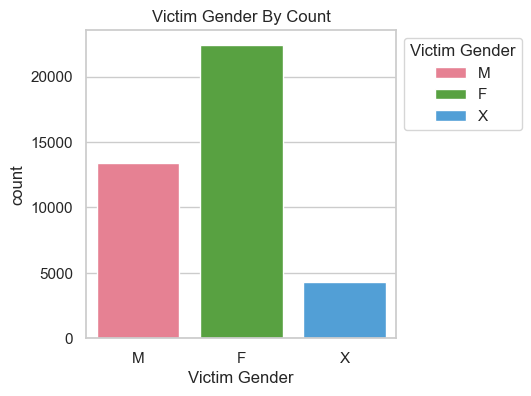

In [43]:
# Victim Gender
fig = plt.figure(figsize=(4,4))
sns.countplot(data=newdf,x=newdf['Victim Gender'],palette='husl',hue=newdf['Victim Gender'],legend=True)
plt.legend(title='Victim Gender',bbox_to_anchor=(1,1))
plt.title('Victim Gender By Count')
plt.show()

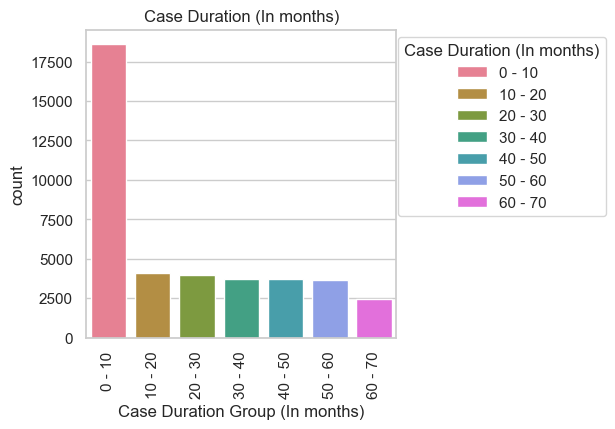

In [42]:
# Case Duration Group
fig = plt.figure(figsize=(4,4))
plt.xticks(rotation=90)
sns.countplot(data=newdf,x=newdf['Case Duration Group (In months)'],palette='husl',hue=newdf['Case Duration Group (In months)'],legend=True)
plt.legend(title='Case Duration (In months)',bbox_to_anchor=(1.7,1))
plt.title('Case Duration (In months)')
plt.show()

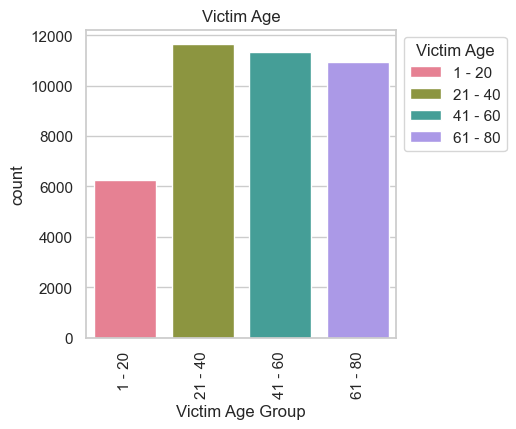

In [46]:
# Victim Age Group
fig = plt.figure(figsize=(4,4))
plt.xticks(rotation=90)
sns.countplot(data=newdf,x=newdf['Victim Age Group'],palette='husl',hue=newdf['Victim Age Group'],legend=True)
plt.legend(title='Victim Age',bbox_to_anchor=(1,1))
plt.title('Victim Age')
plt.show()

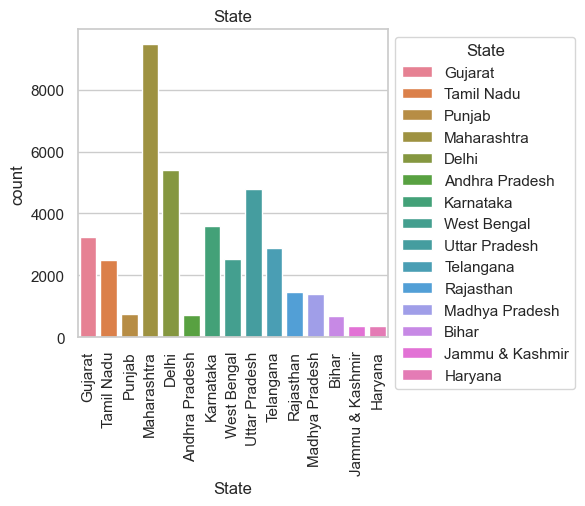

In [47]:
# 4. State
ig = plt.figure(figsize=(4,4))
plt.xticks(rotation=90)
sns.countplot(data=newdf,x=newdf['State'],palette='husl',hue=newdf['State'],legend=True)
plt.legend(title='State',bbox_to_anchor=(1,1))
plt.title('State')
plt.show()

<Axes: xlabel='Crime Description', ylabel='count'>

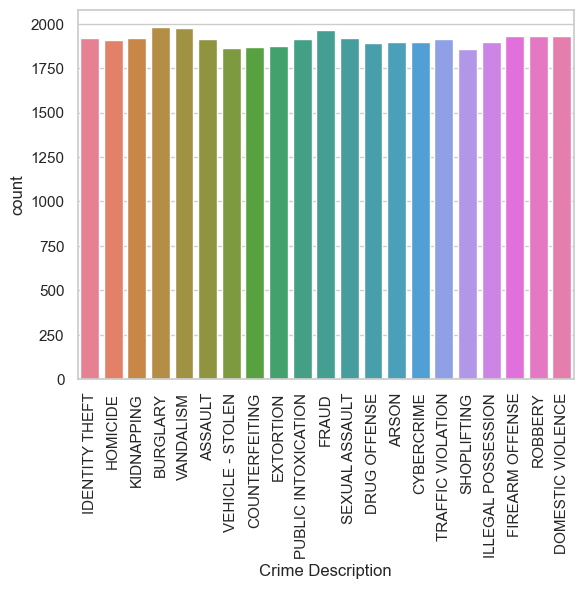

In [17]:
# 1. Crime Description
plt.xticks(rotation=90)
sns.countplot(data=newdf,x=newdf['Crime Description'],palette='husl',hue=newdf['Crime Description'],legend=False)

In [18]:
newdf['Victim Gender'].value_counts()

Victim Gender
F    22423
M    13405
X     4332
Name: count, dtype: int64

In [19]:
newdf.loc[newdf['Victim Gender']=='X']

,Report Number,City,Crime Description,Victim Gender,Weapon Used,Crime Domain,Victim Age Group,State,Case Closed Label,Case Duration Group (In months)
7,8,Chennai,COUNTERFEITING,X,Knife,Other Crime,61 - 80,Tamil Nadu,0,60 - 70
8,9,Mumbai,EXTORTION,X,Blunt Object,Other Crime,41 - 60,Maharashtra,0,60 - 70
13,14,Mumbai,ASSAULT,X,Unknown,Violent Crime,21 - 40,Maharashtra,0,60 - 70
9300,9301,Delhi,COUNTERFEITING,X,Firearm,Other Crime,21 - 40,Delhi,1,0 - 10
9304,9305,Visakhapatnam,ASSAULT,X,Explosives,Violent Crime,21 - 40,Andhra Pradesh,1,0 - 10
...,...,...,...,...,...,...,...,...,...,...
29163,29164,Jaipur,VEHICLE - STOLEN,X,Blunt Object,Violent Crime,61 - 80,Rajasthan,1,0 - 10
29169,29170,Srinagar,KIDNAPPING,X,Poison,Other Crime,41 - 60,Jammu & Kashmir,0,20 - 30
29170,29171,Chennai,FIREARM OFFENSE,X,Unknown,Fire Accident,41 - 60,Tamil Nadu,1,0 - 10
29171,29172,Kolkata,ROBBERY,X,Blunt Object,Violent Crime,21 - 40,West Bengal,0,20 - 30


<Axes: xlabel='Weapon Used', ylabel='count'>

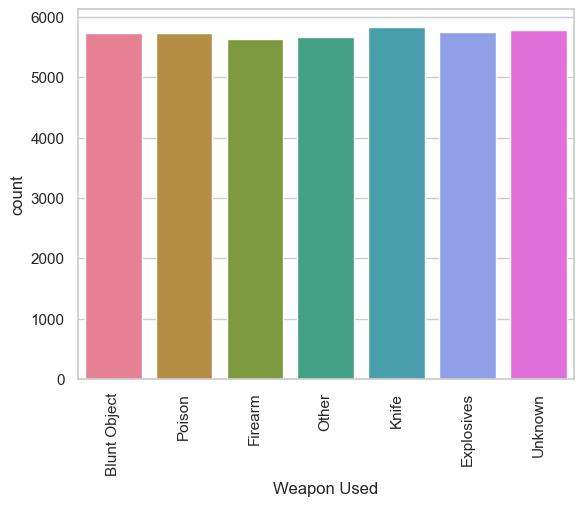

In [20]:
# 3. Weapon Used
plt.xticks(rotation=90)
sns.countplot(data=newdf,x=newdf['Weapon Used'],palette='husl',hue=newdf['Weapon Used'],legend=False)

<Axes: xlabel='Crime Domain', ylabel='count'>

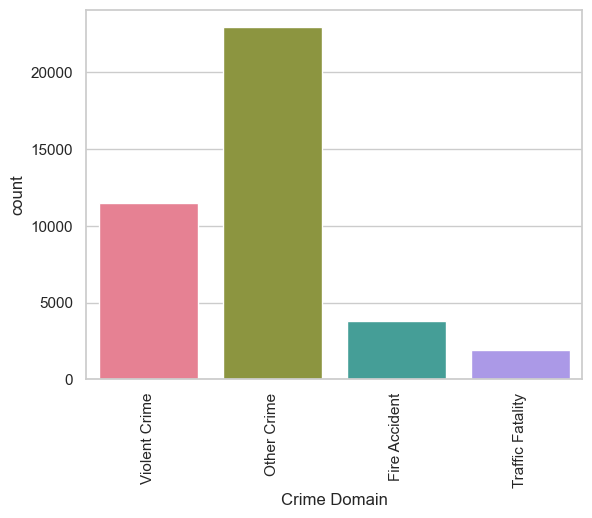

In [21]:
# 3. Crime Domain
plt.xticks(rotation=90)
sns.countplot(data=newdf,x=newdf['Crime Domain'],palette='husl',hue=newdf['Crime Domain'],legend=False)

<Axes: xlabel='Case Closed Label', ylabel='count'>

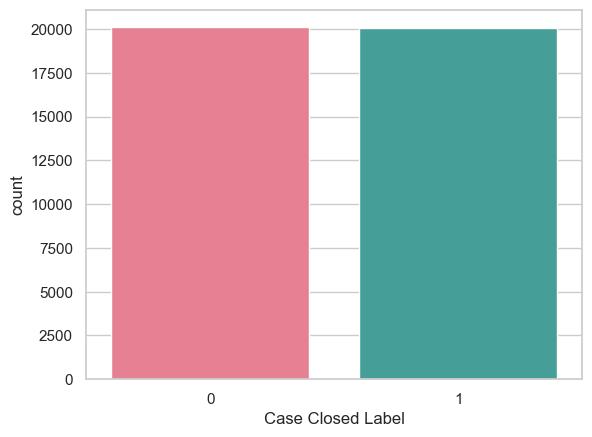

In [25]:
# 5. Case Closed Label
sns.countplot(data=newdf,x=newdf['Case Closed Label'],palette='husl',hue=newdf['Case Closed Label'],legend=False)

# Multivariate Analysis

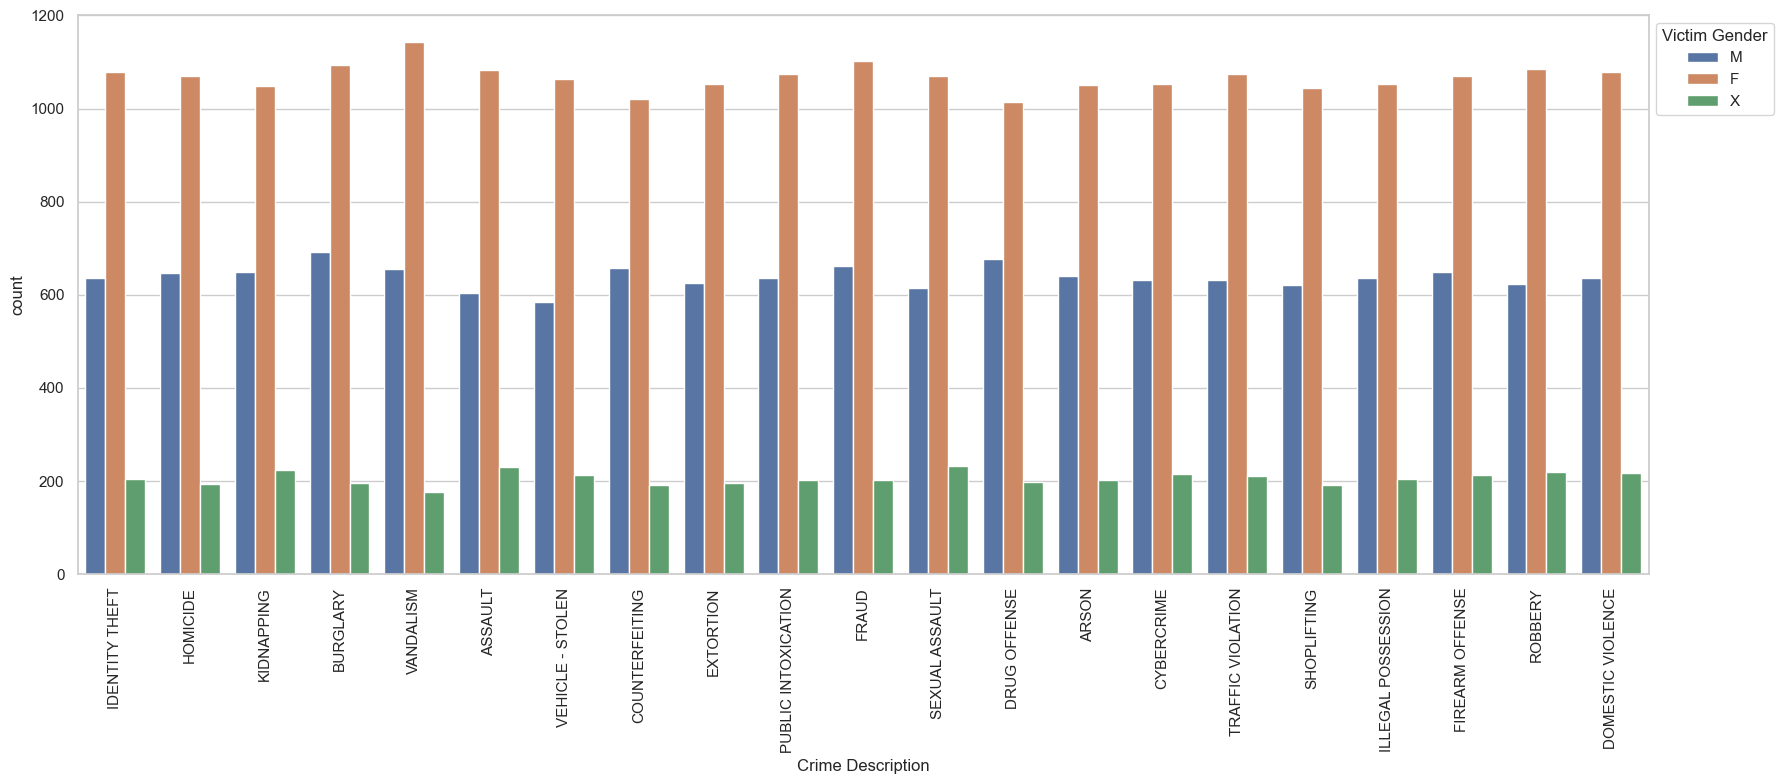

In [26]:
fig = plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sns.countplot(data=newdf,x=newdf['Crime Description'],hue=newdf['Victim Gender'])
plt.legend(title='Victim Gender', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

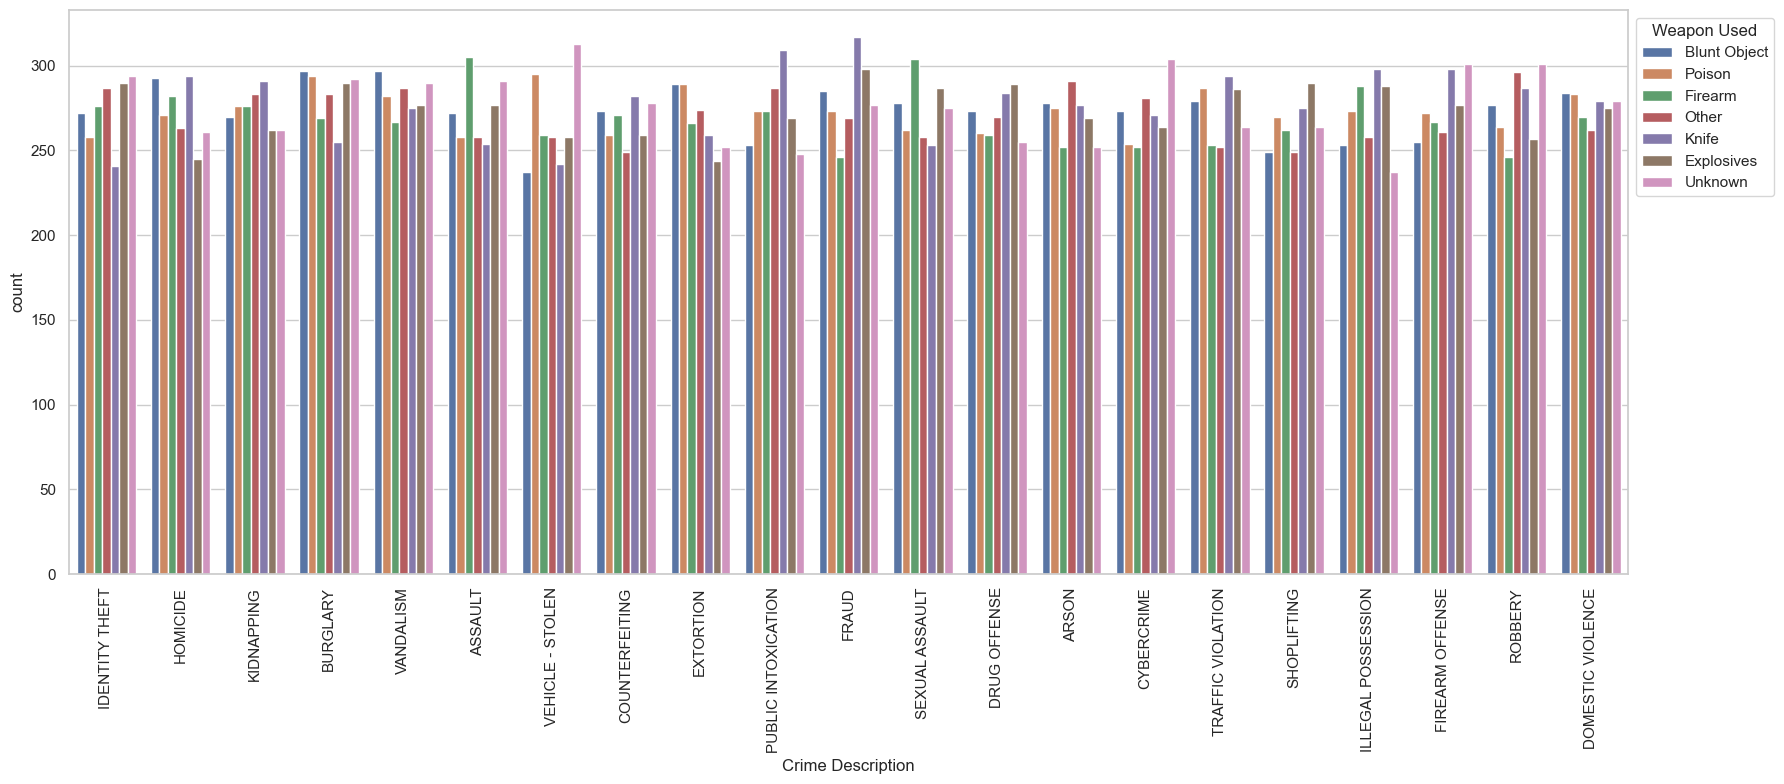

In [27]:
fig = plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sns.countplot(data=newdf,x=newdf['Crime Description'],hue=newdf['Weapon Used'])
plt.legend(title='Weapon Used', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Axes: xlabel='Crime Description', ylabel='Weapon Used'>

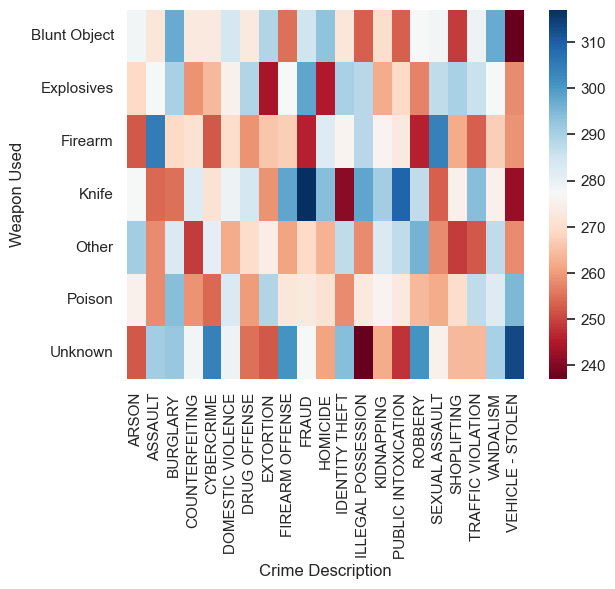

In [28]:
test = pd.pivot_table(data=newdf,index=newdf['Weapon Used'],columns=newdf['Crime Description'],aggfunc='size')
sns.heatmap(data=test,cmap='RdBu')

<Axes: xlabel='Case Duration Group (In months)', ylabel='Crime Description'>

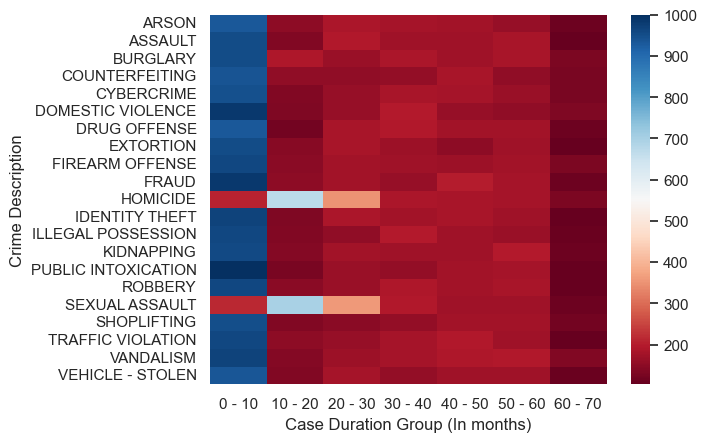

In [50]:
test = pd.pivot_table(data=newdf,index=newdf['Case Duration Group (In months)'],columns=newdf['Crime Description'],aggfunc='size',observed=False)
sns.heatmap(data=test.T,cmap='RdBu')
# print(test)

In [ ]:
fig = plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sns.countplot(data=newdf,x=newdf['Crime Description'],hue=newdf['Case Duration Group'],legend=True)
plt.legend(title='Case Duration Group', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
newdf.info()

<Axes: xlabel='Crime Description', ylabel='State'>

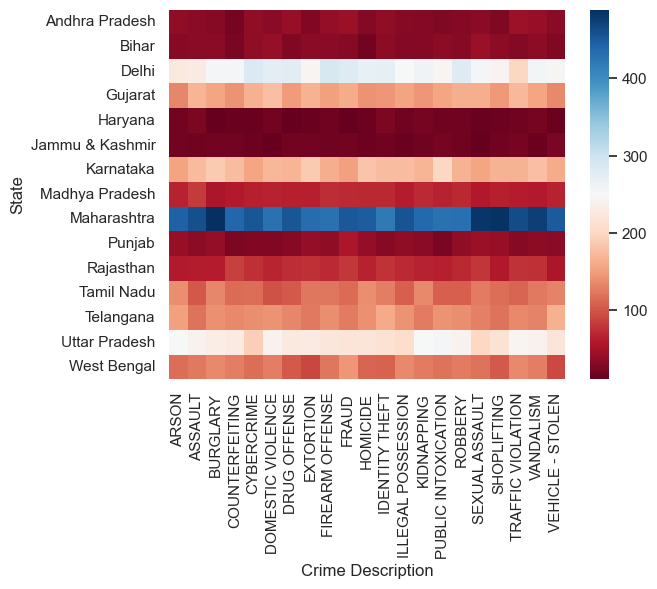

In [52]:
Test = pd.pivot_table(data=newdf,index=newdf['State'],columns=newdf['Crime Description'],aggfunc='size')
sns.heatmap(data=Test,cmap='RdBu')
# print(Test)

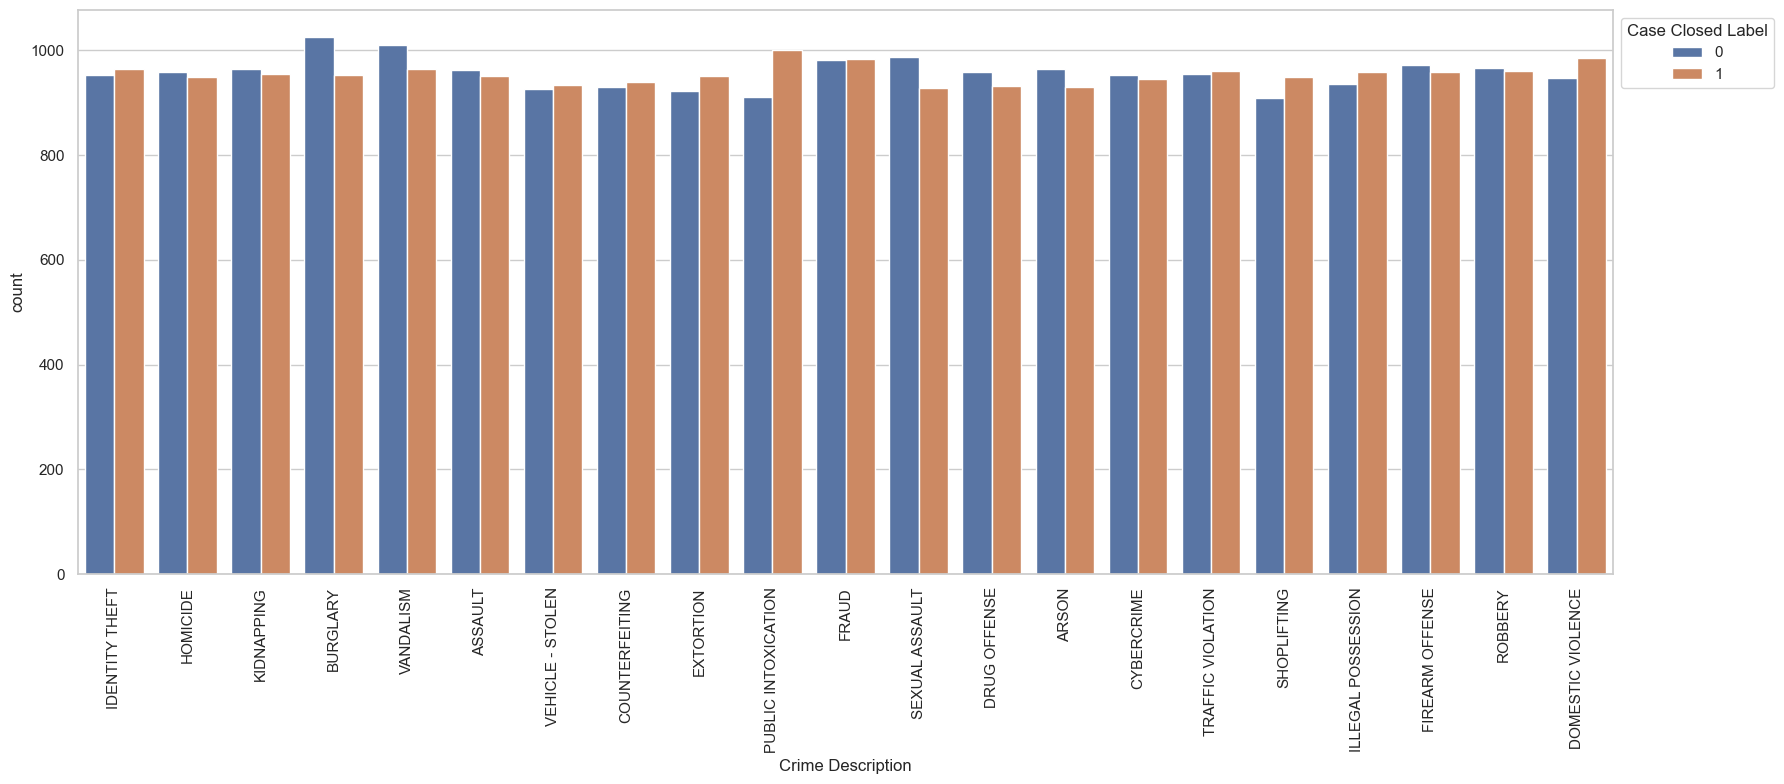

In [53]:
# Test = pd.pivot_table(data=newdf,index=newdf['Case Closed Label'],columns=newdf['Crime Description'],aggfunc='size')
# sns.heatmap(data=Test,cmap='RdBu')
# # print(Test)
fig = plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sns.countplot(data=newdf,x=newdf['Crime Description'],hue=newdf['Case Closed Label'],legend=True)
plt.legend(title='Case Closed Label', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

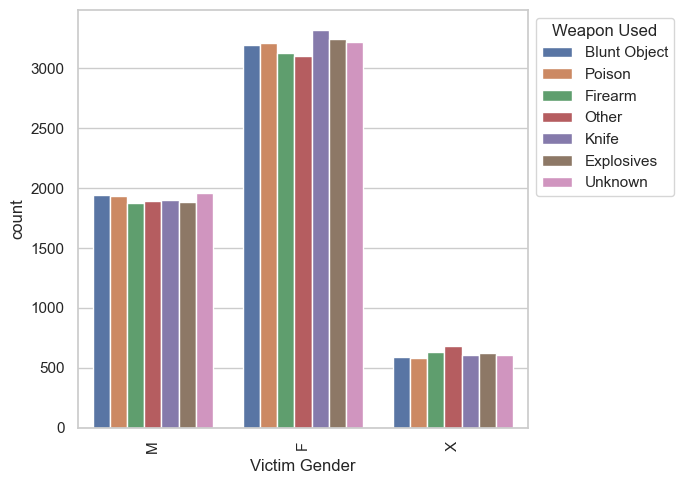

In [54]:
fig = plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
sns.countplot(data=newdf,x=newdf['Victim Gender'],hue=newdf['Weapon Used'])
plt.legend(title='Weapon Used', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

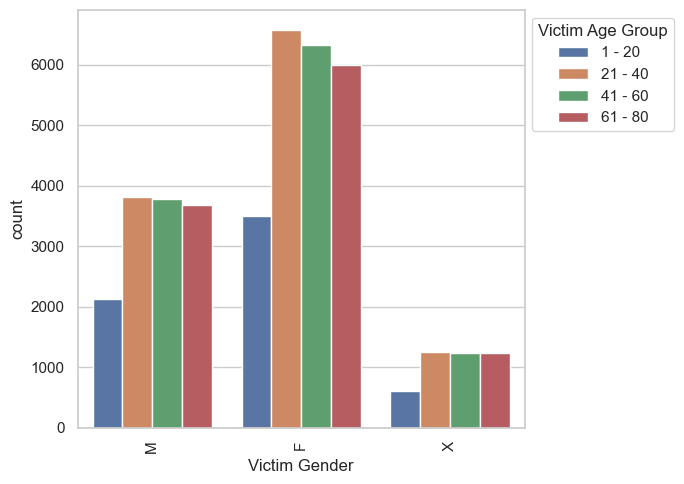

In [56]:
fig = plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
sns.countplot(data=newdf,x=newdf['Victim Gender'],hue=newdf['Victim Age Group'])
plt.legend(title='Victim Age Group', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

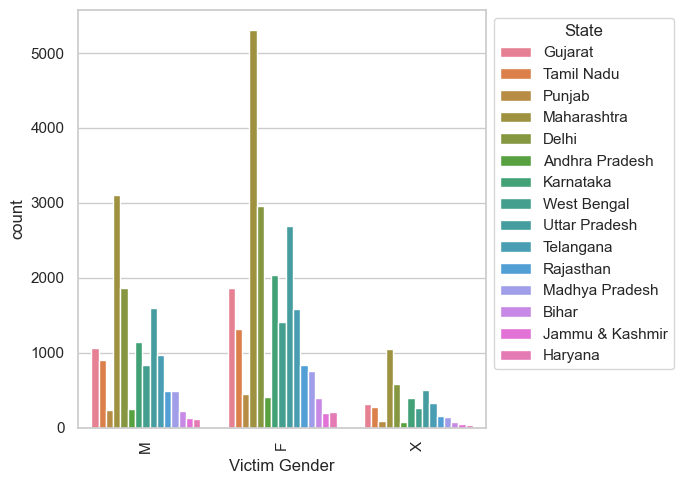

In [57]:
fig = plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
sns.countplot(data=newdf,x=newdf['Victim Gender'],hue=newdf['State'])
plt.legend(title='State', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

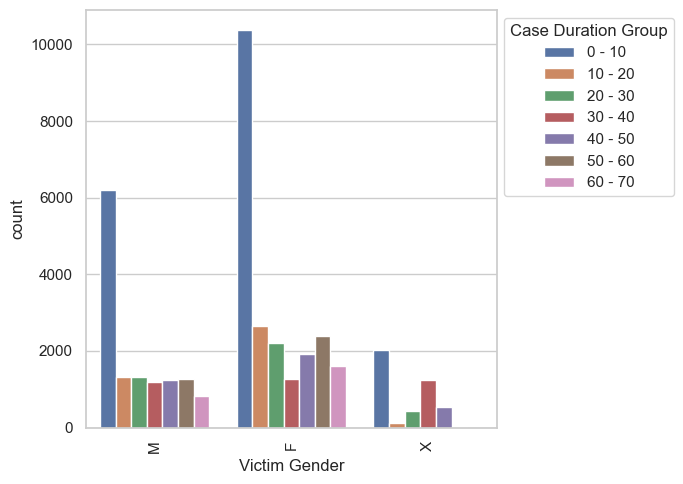

In [73]:
fig = plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
sns.countplot(data=newdf,x=newdf['Victim Gender'],hue=newdf['Case Duration Group (In months)'])
plt.legend(title='Case Duration Group', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

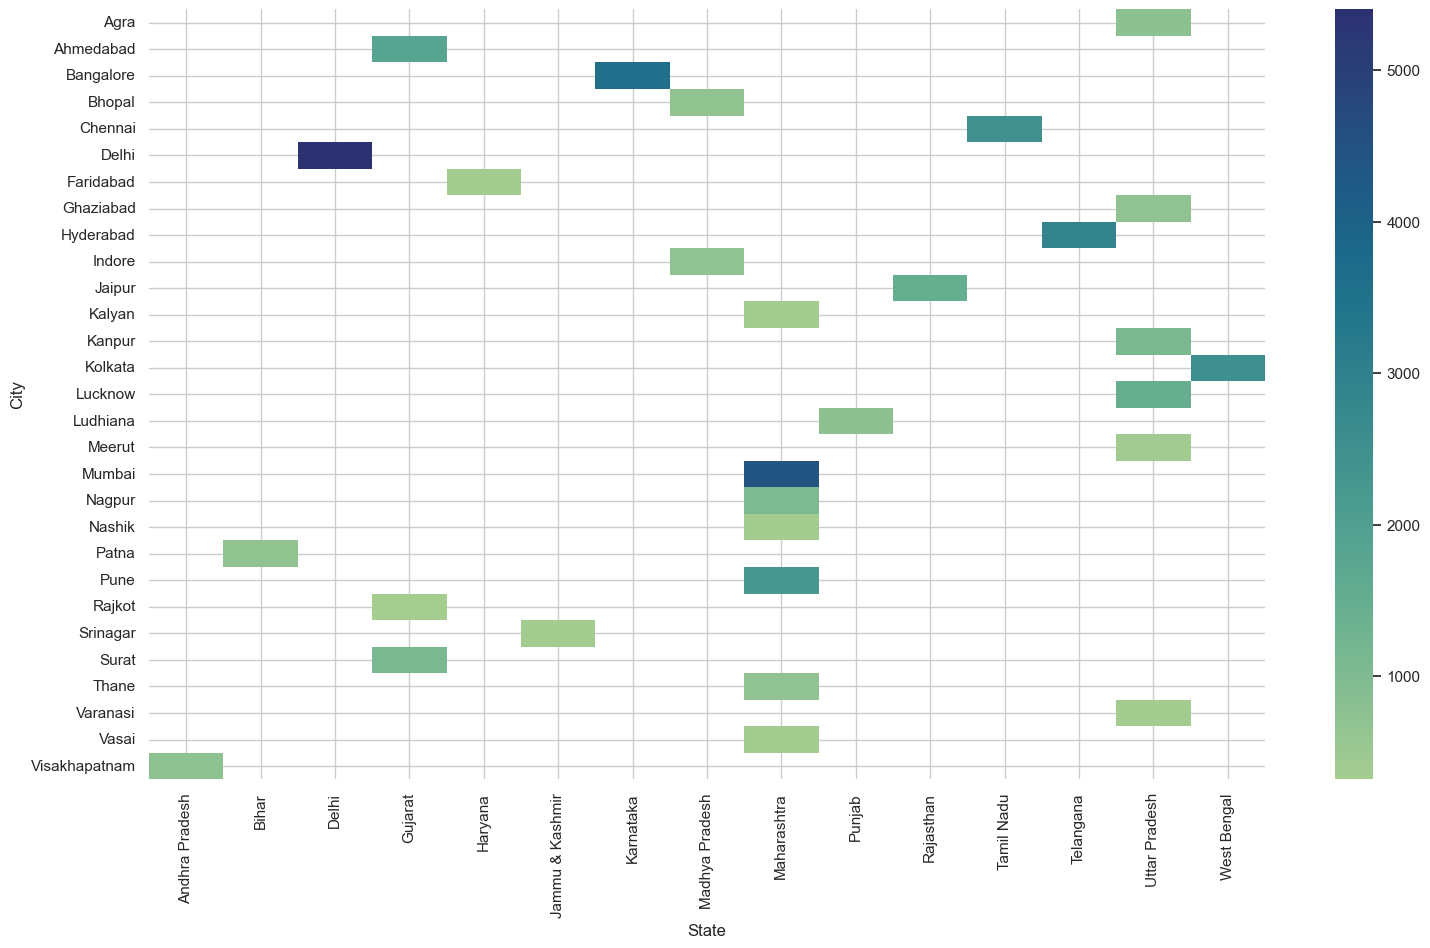

In [75]:
fig = plt.figure(figsize=(18,10))
Test = pd.pivot_table(data=newdf,index=df['City'],columns=newdf['State'],aggfunc='size')
sns.heatmap(data=Test,cmap='crest')
plt.show()
# print(Test)

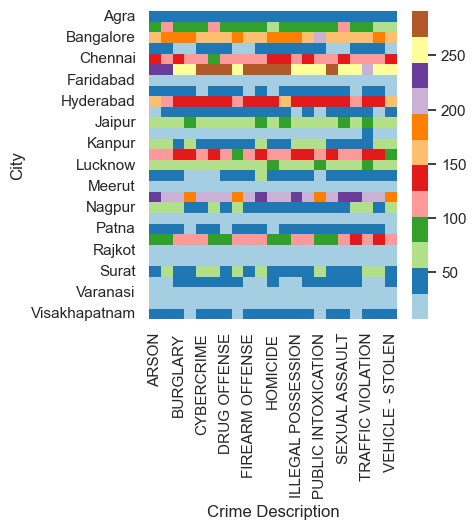

In [77]:

fig = plt.figure(figsize=(4,4))
Test = pd.pivot_table(data=newdf,index=df['City'],columns=newdf['Crime Description'],aggfunc='size')
sns.heatmap(data=Test,cmap='Paired')
plt.show()

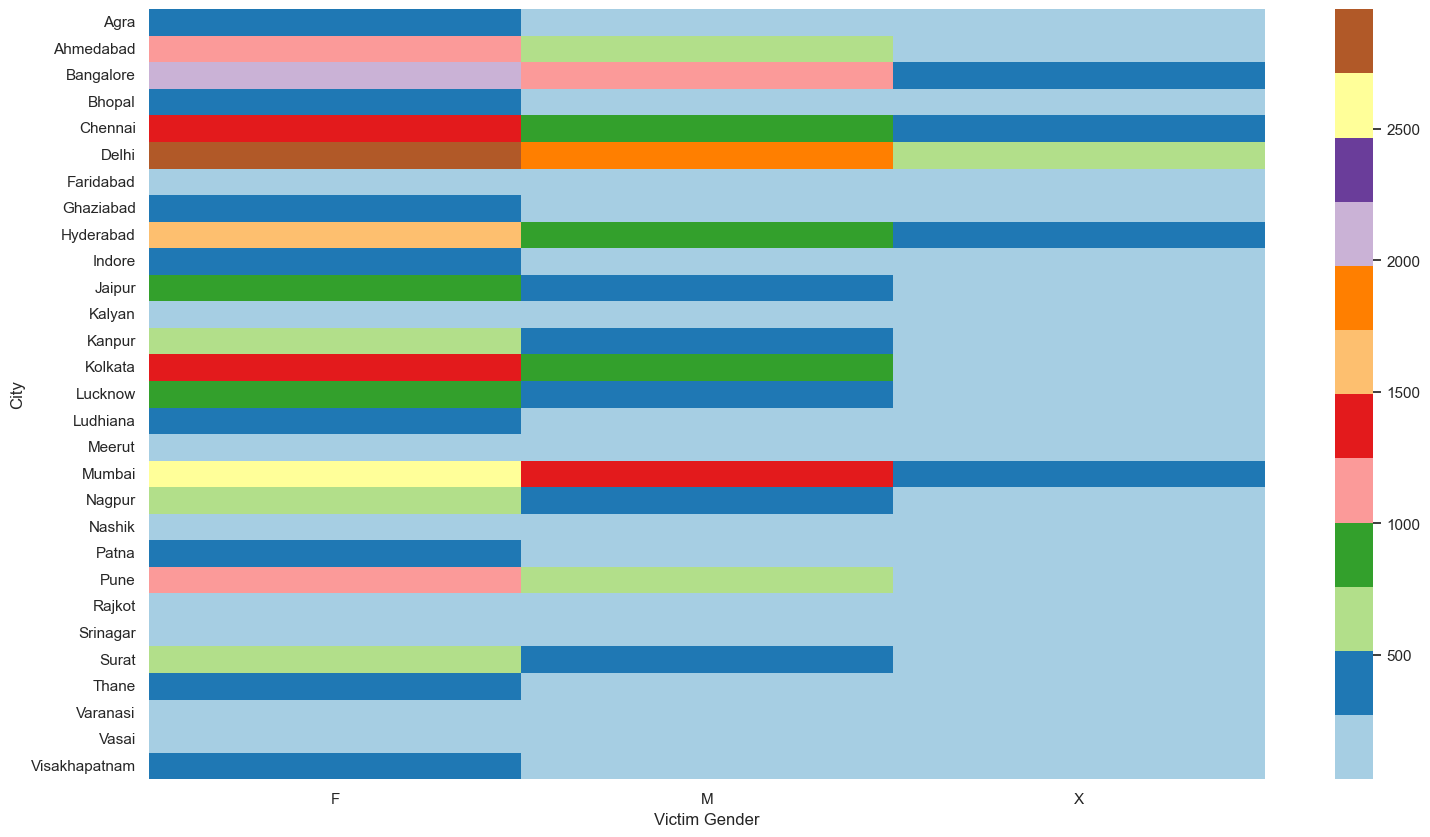

In [80]:
fig = plt.figure(figsize=(18,10))
Test = pd.pivot_table(data=newdf,index=df['City'],columns=newdf['Victim Gender'],aggfunc='size')
sns.heatmap(data=Test,cmap='Paired')
plt.show()

INSIGHT :
Delhi and Mumbai report the highest number of female crime victims, indicating a concerning trend 
in urban safety for women. This underscores the urgent need for gender-focused crime prevention 
policies in major metropolitan regions. Other cities like Faridabad and Chennai also show elevated 
female victim counts, reinforcing the pattern.